## Diesel Truck Data


The data was gathered on diesel truck Inline 6-cylinder, 4-stroke-cycle.  The truck sensors(channels) are measured based on indutry standard.  

There are two industry standard.  One is Society of Automotive Engineers standard SAE J1939 is the vehicle bus recommended practice used for communication and diagnostics among vehicle components. Originating in the car and heavy-duty truck industry in the United States, it is now widely used in other parts of the world.  

The J1587 protocol is exclusively used within heavy duty vehicles, where it is used for data exchange between nodes in a network, driver information or diagnosis. Areas of use are: Vehicle and component information (performance, maintenance, diagnosis).  In this research, the team used both as they are available to capture the system behaviors.  

In this project, we will focus on the enigne system


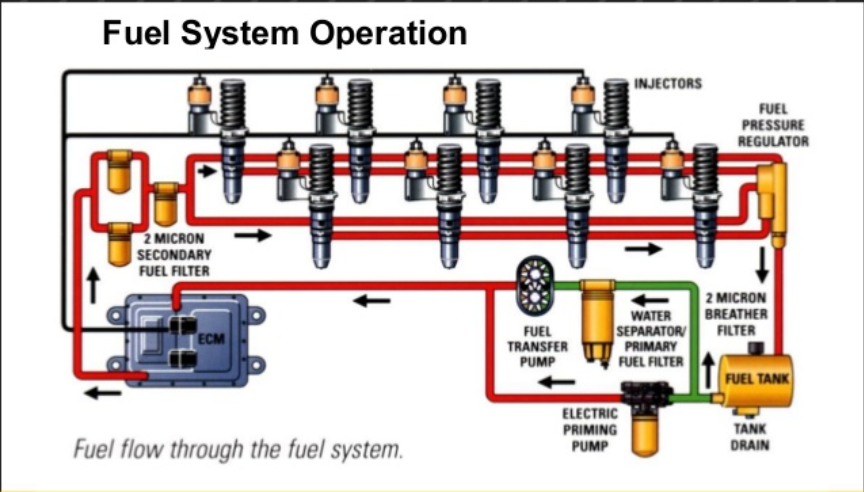

In [1]:
from IPython.display import Image
#Image(filename='LubeSystem.png')
Image(filename='fuelsystem.png')
#The image was taken from https://www.slideshare.net/wilbort/engine-systems-diesel-engine-analyst-full
#https://www.conequip.com/docs/cat_c7_diesel_engine_parts_diagram.pdf

In [54]:
!pip install pandas pyarrow

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import pyarrow.parquet as pq

## Methods Description

The workflow involves the following steps:

- **Data Preprocessing**: Handling missing values, feature scaling, and encoding categorical variables if necessary.
- **Feature Selection**: Selecting relevant features for prediction.
- **Model Training**: Training models using the training dataset.
- **Hyperparameter Tuning**: Fine-tuning models to improve performance.
- **Evaluation**: Evaluating model performance on a separate test dataset.

We explore following model:

- **Random Forest (Tree-based):** Chosen for its ability to handle non-linear data and provide feature importance.


In [46]:
#Read data
import pandas as pd
parquet_file_path = 'myDataset_VIN02731.parquet'
df = pd.read_parquet(parquet_file_path)
#read the channel_name.csv file.  This list was provided by the domain expert on what channels are important for analysis.
df_channel_name = pd.read_csv('channel_name_with_unit.csv')

selected_columns = df_channel_name[df_channel_name['Select']==1]['Keyword'].tolist()
#create a table of selected colummns and its df_channel_name    
df_channel_name_selected = df_channel_name[df_channel_name['Select']==1]   
df_channel_name_selected[['Keyword', 'channel_name', 'Measurement_Unit']]
# in the channel name, remove the first 7 characters.  This is to remove the "Engine_" or "Transmission_" prefix and end of the words what is inside the bracket.

df_channel_name_selected.loc[:, 'channel_name'] = df_channel_name_selected['channel_name'].str.split('(').str[0]

# Remove the first 7 characters from 'channel_name'
df_channel_name_selected.loc[:, 'channel_name'] = df_channel_name_selected['channel_name'].str[7:]

df_channel_name_selected[['Keyword', 'channel_name', 'Measurement_Unit']]
#convert the measurement unit to engineering unit

df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Degrees Fahrenheit', 'F')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Pounds Per Square Inch', 'psi')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Gallons', 'gallons')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Integer Percentage, Percent Form', '%')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Base 10 Real Number', '')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Float Percentage, Percent Form', '%')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Base 10 Integer Number', '')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Revolutions Per Minute (RPM)', 'RPM')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('gal (U.S.) Per Hour', 'gallons/hr')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('gallons (U.S.) Per Hour', 'gallons/hr')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('Miles Per Hour', 'miles/hour')
df_channel_name_selected.loc[:,'Measurement_Unit'] = df_channel_name_selected['Measurement_Unit'].str.replace('ASCII String', '')

# remove the index
df_channel_name_selected = df_channel_name_selected.reset_index(drop=True)  
#remove the Select column
df_channel_name_selected = df_channel_name_selected.drop(columns=['Select'])
df_channel_name_selected

,Keyword,channel_name,Measurement_Unit
0,AccelPedalPos,Accelerator Pedal Position,%
1,BarPres_Eng_1587,Barometric Pressure,psi
2,BoostPres,Boost Pressure/Engine Intake Manifold #1 Pres...,psi
3,BoostPres_1587,Boost Pressure,psi
4,ClutchSwtch,Clutch Switch,
5,CoolantLevel,Coolant Level,%
6,EngCoolantTemp,Engine Coolant Temperature,F
7,EngCoolantTemp_1587,Engine Coolant Temperature,F
8,EngDesiredOpSpd,Engine s Desired Operating Speed,RPM
9,EngDmdPctTorq,Engine Demand - Percent Torque,%


In [ ]:
# Assuming df_channel_name_selected is your DataFrame and you're modifying the 'channel_name' column
# Split 'channel_name' at '(' and keep the first part
df_channel_name_selected.loc[:, 'channel_name'] = df_channel_name_selected['channel_name'].str.split('(').str[0]

# Remove the first 7 characters from 'channel_name'
df_channel_name_selected.loc[:, 'channel_name'] = df_channel_name_selected['channel_name'].str[7:]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1720248 entries, 2016-02-02 16:20:25 to 2020-02-12 22:09:20
Columns: 173 entries, UTC_1Hz to VehSpeedBrakes_1587
dtypes: datetime64[ns](3), float64(151), object(19)
memory usage: 2.2+ GB


In [8]:
df.describe

<bound method NDFrame.describe of                                 UTC_1Hz  BrakeSwitch CrankcasePres  \
time                                                                 
2016-02-02 16:20:25 2016-02-02 16:20:25          0.0          None   
2016-02-02 16:20:26 2016-02-02 16:20:26          0.0          None   
2016-02-02 16:20:27 2016-02-02 16:20:27          0.0          None   
2016-02-02 16:20:28 2016-02-02 16:20:28          0.0          None   
2016-02-02 16:20:29 2016-02-02 16:20:29          0.0          None   
...                                 ...          ...           ...   
2020-02-12 22:09:16 2020-02-12 22:09:16          0.0          None   
2020-02-12 22:09:17 2020-02-12 22:09:17          0.0          None   
2020-02-12 22:09:18 2020-02-12 22:09:18          0.0          None   
2020-02-12 22:09:19 2020-02-12 22:09:19          0.0          None   
2020-02-12 22:09:20 2020-02-12 22:09:20          0.0          None   

                     TrOutShaftSp  AuxHeatModeReq  EngS

#Here there are measured channels 

In [9]:
#Slice Data for 2017 and 2018
#maintennace event happened for the injector was in 2018.  So, we take take from 2017 and 2018
#extract data from 2017 and 2018
df_2017_2018 = df[(df['UTC_1Hz'] > '2017-01-01') & (df['UTC_1Hz'] < '2019-01-01')]

In [10]:
df_2017_2018.sample(5).T

time,2017-03-15 15:03:04,2018-10-02 12:47:47,2017-07-03 14:09:26,2017-01-04 18:44:48,2018-09-21 15:57:13
UTC_1Hz,2017-03-15 15:03:04,2018-10-02 12:47:47,2017-07-03 14:09:26,2017-01-04 18:44:48,2018-09-21 15:57:13
BrakeSwitch,0.0,0.0,0.0,0.0,0.0
CrankcasePres,None,None,None,None,None
TrOutShaftSp,220.75,0.0,0.0,987.5,0.0
AuxHeatModeReq,15.0,15.0,15.0,15.0,15.0
...,...,...,...,...,...
AltSpeed,2351.0,1895.0,1697.0,4081.0,1698.0
EngAltWindingTemp,100.0,111.0,122.0,70.0,93.0
IntManfTemp_1587,NaN,105.0,105.0,NaN,98.0
InjCtrlPres_1587,NaN,1682.802002,1465.794189,NaN,1472.026855


In [11]:
df_2017_2018_selected = df_2017_2018[selected_columns]
# if the columns are showing more than 90% cells are empty, then drop the column
df_2017_2018_selected = df_2017_2018_selected.dropna(axis=1, thresh=int(0.9*len(df_2017_2018_selected)))
#check each column and find out what % are nan
nan_percentage = df_2017_2018_selected.isna().mean().round(4) * 100
print("number of channels" , len(nan_percentage))
#print("nan_percentage:\n", nan_percentage)
display(nan_percentage)
#drop rows that has nan
df_2017_2018_selected = df_2017_2018_selected.dropna()
print('After dropping nans size of the data is', df_2017_2018_selected.shape)


number of channels 32


AccelPedalPos                   0.06
BoostPres                       0.16
ClutchSwtch                     0.08
EngCoolantTemp                  0.42
EngDesiredOpSpd                 0.09
EngDmdPctTorq                   0.02
EngLoad_1587                    0.09
EngOilPres                      0.18
EngPctLdAtCurSpd                0.06
EngPctTorq                      0.02
EngSpeed                        0.02
EngSpeed_1587                   0.09
FuelRate                        0.08
FuelRate_1587                   0.09
InjCtlPres                      0.15
InpSftSp                        0.02
InstFuelEco                     0.08
InstFuelEco_1587                0.09
IntManfTemp                     0.16
PctEngLoad                      0.02
TranActGearRato                 0.08
TransCurGear                    0.08
TransDrivEng                    0.02
TransOilTemp                    0.45
TransOilTemp_1587               0.35
TransOptShaftSpeedTrans_1587    0.08
TransTorqConvLockupEngaged      0.02
T

After dropping nans size of the data is (960325, 32)


In [12]:
#Develop a function to conduct EDA on the sensor data
def ExploratoryDataAnalysis(df): 
    ExploratoryDataAnalysis_df = {}
    ExploratoryDataAnalysis_df['null_sum'] = df.isnull().sum()
    ExploratoryDataAnalysis_df['null_pct'] = df.isnull().mean()
    ExploratoryDataAnalysis_df['dtypes'] = df.dtypes
    ExploratoryDataAnalysis_df['count'] = df.count()
    ExploratoryDataAnalysis_df['mean'] = df.mean()
    ExploratoryDataAnalysis_df['median'] = df.median()
    ExploratoryDataAnalysis_df['min'] = df.min()
    ExploratoryDataAnalysis_df['max'] = df.max()
    
    return pd.DataFrame(ExploratoryDataAnalysis_df)
ExploratoryDataAnalysis(df_2017_2018_selected)

,null_sum,null_pct,dtypes,count,mean,median,min,max
AccelPedalPos,0,0.0,float64,960325,12.835877,0.000000,0.000000,100.000000
BoostPres,0,0.0,float64,960325,1.791755,0.290080,0.000000,27.267521
ClutchSwtch,0,0.0,float64,960325,2.999997,3.000000,0.000000,3.000000
EngCoolantTemp,0,0.0,float64,960325,169.280244,186.800003,24.799999,206.600006
EngDesiredOpSpd,0,0.0,float64,960325,978.374964,700.000000,700.000000,2800.000000
EngDmdPctTorq,0,0.0,float64,960325,19.465606,15.000000,0.000000,100.000000
EngLoad_1587,0,0.0,float64,960325,19.161792,12.500000,0.000000,99.500000
EngOilPres,0,0.0,float64,960325,38.279037,39.450199,0.000000,147.358093
EngPctLdAtCurSpd,0,0.0,float64,960325,19.002912,11.000000,0.000000,99.000000
EngPctTorq,0,0.0,float64,960325,12.412238,0.000000,0.000000,100.000000


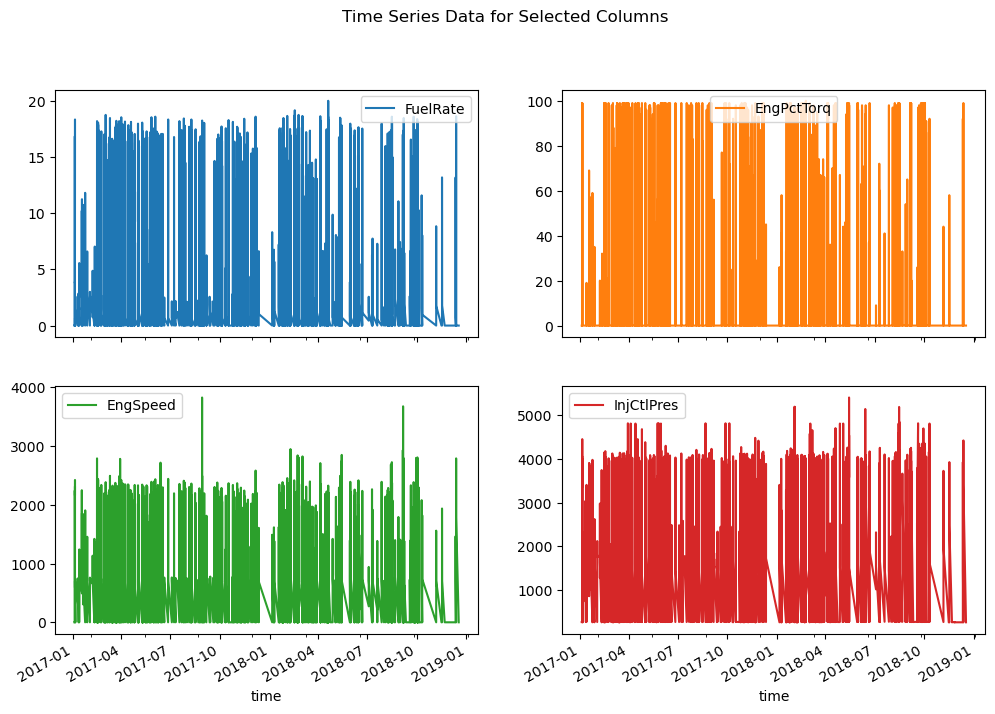

In [13]:
#plot few key columns on time index ['FuelRate', 'EngPctTorq', 'EngSpeed', 'InjCtlPres']
df_2017_2018_selected[['FuelRate', 'EngPctTorq', 'EngSpeed', 'InjCtlPres']].plot(subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Time Series Data for Selected Columns')
plt.show()


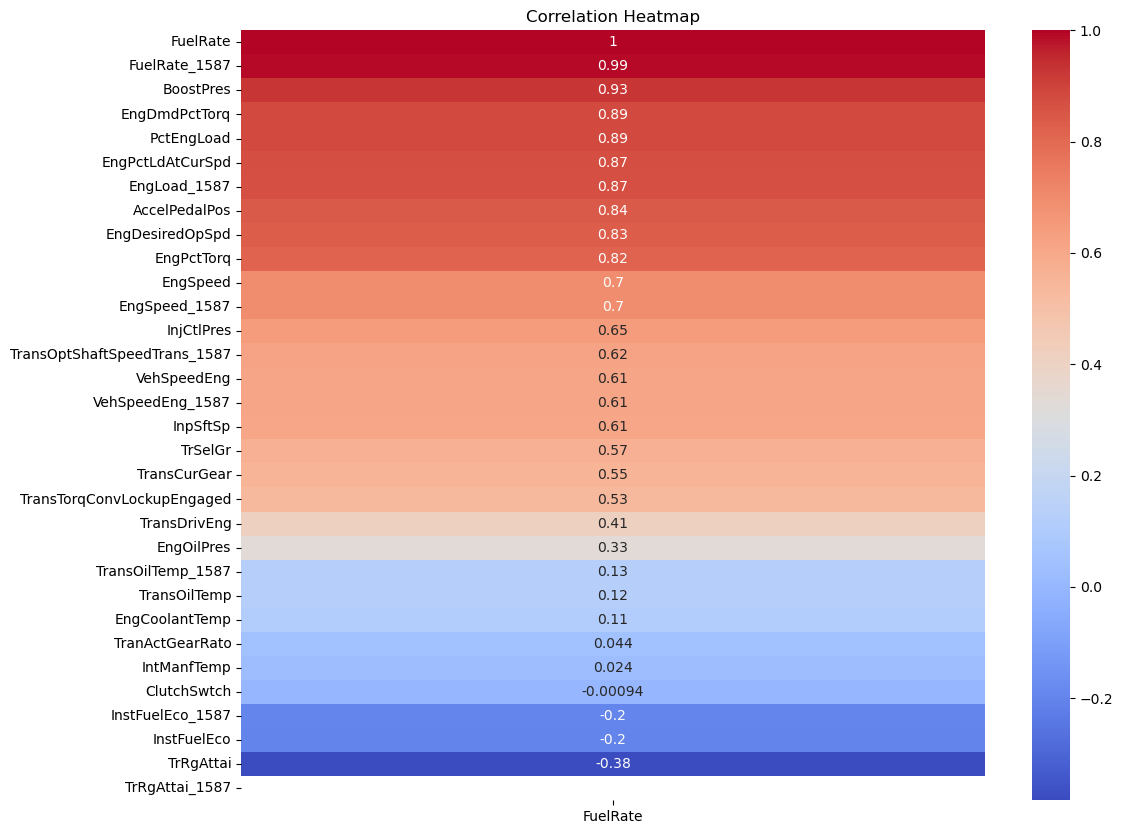

In [14]:
#run a correlation study on the FuelRate as compared to the other columns
correlation = df_2017_2018_selected.corr()
correlation = correlation['FuelRate'].sort_values(ascending=False)
#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

FuelRate and FuelRate_1587 are the same.  Theefore, you have to eliminate one of the channel from the columns

In [15]:
#select channels that more than .5 correlation with FuelRate
selected_columns_high_correlation = correlation[correlation > 0.1].index.tolist()
display(selected_columns_high_correlation)


['FuelRate',
 'FuelRate_1587',
 'BoostPres',
 'EngDmdPctTorq',
 'PctEngLoad',
 'EngPctLdAtCurSpd',
 'EngLoad_1587',
 'AccelPedalPos',
 'EngDesiredOpSpd',
 'EngPctTorq',
 'EngSpeed',
 'EngSpeed_1587',
 'InjCtlPres',
 'TransOptShaftSpeedTrans_1587',
 'VehSpeedEng',
 'VehSpeedEng_1587',
 'InpSftSp',
 'TrSelGr',
 'TransCurGear',
 'TransTorqConvLockupEngaged',
 'TransDrivEng',
 'EngOilPres',
 'TransOilTemp_1587',
 'TransOilTemp',
 'EngCoolantTemp']

In [16]:
#preproces the data
# VehSpeedEng>0 or < 60
# EngSpeed > 700
# FuelRate > .5
# AccelPedalPos > 0

#create a fubction to preprocess the data
df_2017_2018_selected_high_correlation = df_2017_2018_selected[selected_columns_high_correlation]
def preprocess_data(df):
    df = df[(df['VehSpeedEng'] > 0) & (df['VehSpeedEng'] < 60)]
    df = df[df['EngSpeed'] > 700]
    df = df[df['FuelRate'] > 0.5]
    df = df[df['AccelPedalPos'] > 0]
    return df
df_2017_2018_selected_preprocessed = preprocess_data(df_2017_2018_selected_high_correlation)
#drop duplicate similar columns
#['FuelRate_1587', 'TransOilTemp_1587', 'VehSpeedEng_1587', 'EngSpeed_1587', 'TransDrivEng']
df_2017_2018_selected_preprocessed = df_2017_2018_selected_preprocessed.drop(['FuelRate_1587', 'TransOilTemp_1587', 'VehSpeedEng_1587', 'EngSpeed_1587', 'TransDrivEng'], axis=1)
df_2017_2018_selected_preprocessed.shape
# #convert the data colums of TrSelGr, TransCurGear, TransTorqConvLockupEngaged as categorical data
# df_2017_2018_selected_preprocessed['TrSelGr'] = df_2017_2018_selected_preprocessed['TrSelGr'].astype('category')
# df_2017_2018_selected_preprocessed['TransCurGear'] = df_2017_2018_selected_preprocessed['TransCurGear'].astype('category')
# df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'] = df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'].astype('category')

(305274, 20)

In [17]:
# EDA on the df_2017_2018_selected_preprocessed
ExploratoryDataAnalysis(df_2017_2018_selected_preprocessed)

,null_sum,null_pct,dtypes,count,mean,median,min,max
FuelRate,0,0.0,float64,305274,5.449051,4.623011,0.528344,19.997824
BoostPres,0,0.0,float64,305274,5.178161,2.900800,0.000000,27.267521
EngDmdPctTorq,0,0.0,float64,305274,35.571988,33.000000,0.000000,93.000000
PctEngLoad,0,0.0,float64,305274,35.571981,33.000000,0.000000,93.000000
EngPctLdAtCurSpd,0,0.0,float64,305274,37.732719,33.000000,0.000000,99.000000
EngLoad_1587,0,0.0,float64,305274,36.049100,32.500000,0.000000,99.500000
AccelPedalPos,0,0.0,float64,305274,37.768561,36.400002,0.400000,100.000000
EngDesiredOpSpd,0,0.0,float64,305274,1496.252067,1481.625000,700.000000,2800.000000
EngPctTorq,0,0.0,float64,305274,36.386915,37.000000,0.000000,99.000000
EngSpeed,0,0.0,float64,305274,1430.814738,1479.000000,700.250000,2824.500000


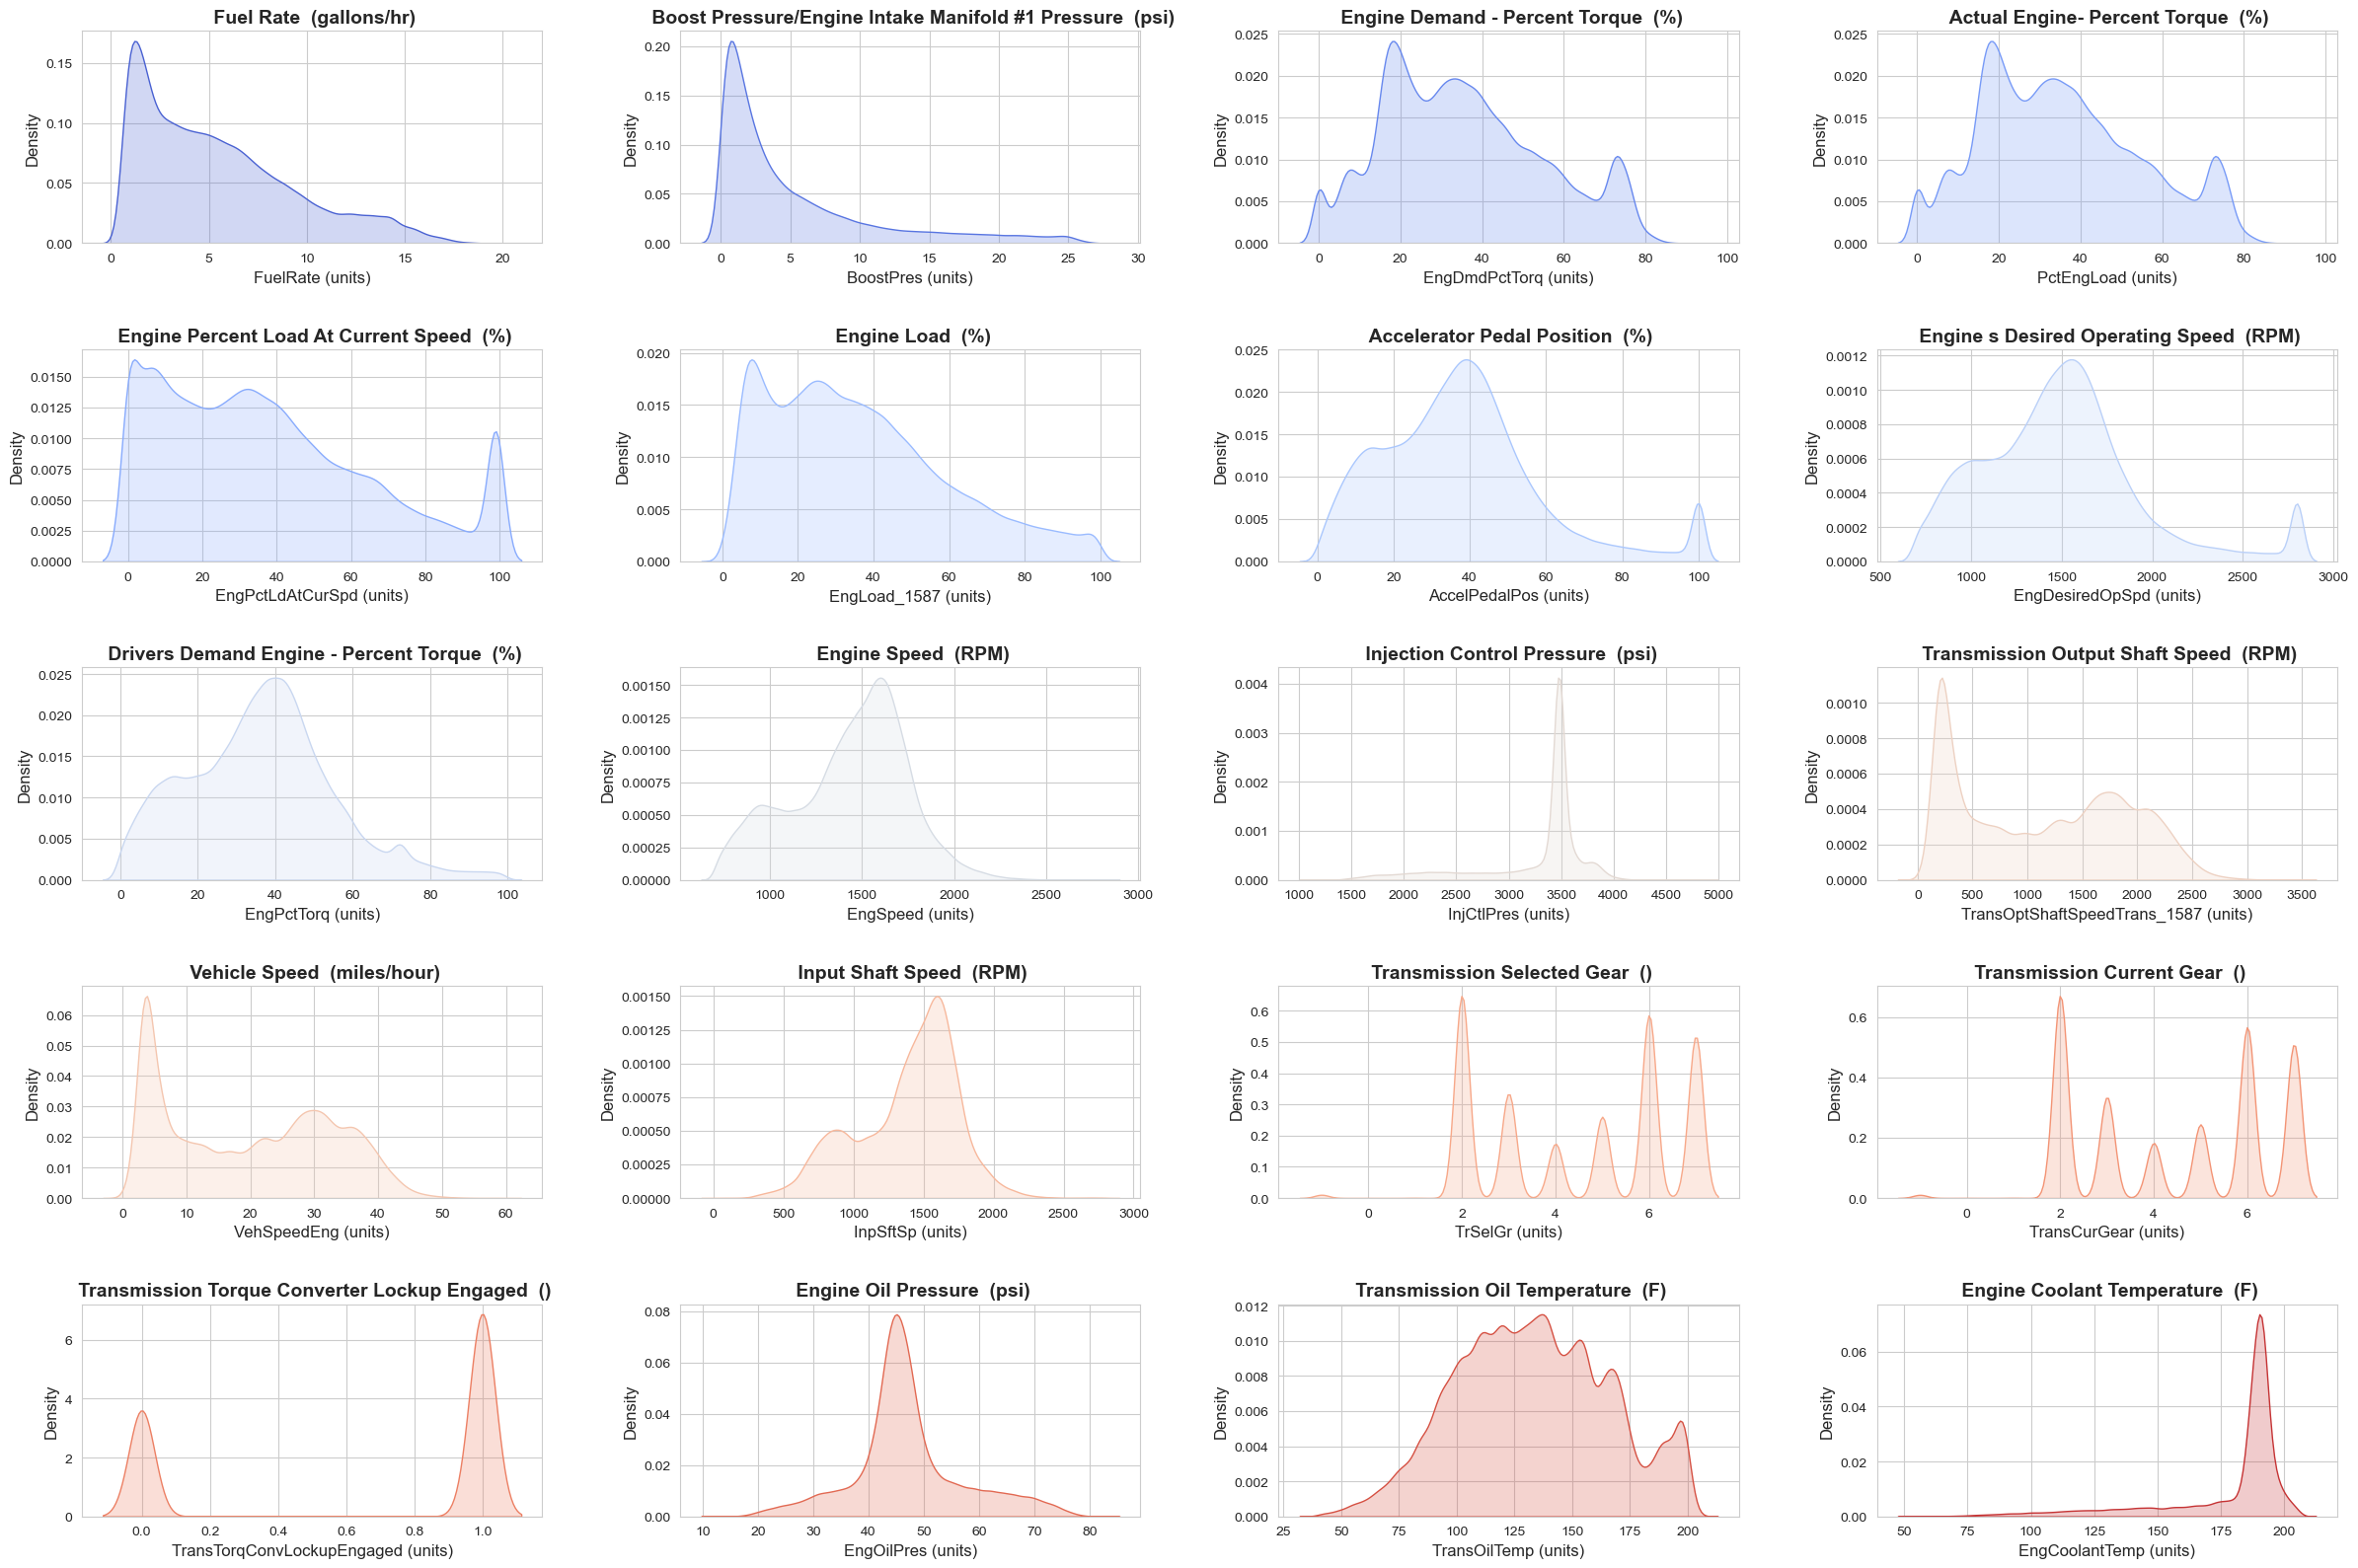

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Assuming 'df' is your DataFrame

def enhanced_kde_plot(df):
    # Set the overall aesthetic style of the plots
    sns.set_style("whitegrid")
    # Define a consistent color palette
    palette = sns.color_palette("coolwarm", n_colors=len(df.columns))
    
    # Create a 5x4 subplot grid
    fig, axs = plt.subplots(5, 4, figsize=(24, 16))
    axs = axs.ravel() # Flatten the array of axes
    
    for i, col in enumerate(df.columns):
        # Use the consistent palette for each plot
        sns.kdeplot(data=df, x=col, fill=True, ax=axs[i], color=palette[i])
        axs[i].set_title(col, fontsize=14, fontweight='bold')
        #title use the channel name and the measurement unit
        axs[i].set_title(df_channel_name_selected.loc[df_channel_name_selected['Keyword'] == col, 'channel_name'].values[0] + ' (' + df_channel_name_selected.loc[df_channel_name_selected['Keyword'] == col, 'Measurement_Unit'].values[0] + ')', fontsize=14, fontweight='bold')
        
        axs[i].set_xlabel(col + ' (units)', fontsize=12) # Replace 'units' with actual units if available
        axs[i].set_ylabel('Density', fontsize=12)
        axs[i].tick_params(axis='both', which='major', labelsize=10)
        axs[i].grid(True) # Optional: Add gridlines
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the spacing between plots
    
    plt.show()

# Call the function with your DataFrame
enhanced_kde_plot(df_2017_2018_selected_preprocessed)


In [51]:
#create the table df_2017_2018_selected_preprocessed.columns matched with df_channel_name_selected['Keyword'] and measurement unit
df_channel_name_selected_table  = df_channel_name_selected[df_channel_name_selected['Keyword'].isin(df_2017_2018_selected_preprocessed.columns)]
df_channel_name_selected_table 

,Keyword,channel_name,Measurement_Unit
0,AccelPedalPos,Accelerator Pedal Position,%
2,BoostPres,Boost Pressure/Engine Intake Manifold #1 Pres...,psi
6,EngCoolantTemp,Engine Coolant Temperature,F
8,EngDesiredOpSpd,Engine s Desired Operating Speed,RPM
9,EngDmdPctTorq,Engine Demand - Percent Torque,%
10,EngLoad_1587,Engine Load,%
11,EngOilPres,Engine Oil Pressure,psi
13,EngPctLdAtCurSpd,Engine Percent Load At Current Speed,%
14,EngPctTorq,Drivers Demand Engine - Percent Torque,%
17,EngSpeed,Engine Speed,RPM


| Keyword | Channel Name | Measurement Unit | Description |
|---------|--------------|------------------|-------------|
| AccelPedalPos | Accelerator Pedal Position | % | Indicates the position of the accelerator pedal, with higher percentages representing a more depressed pedal. |
| BoostPres | Boost Pressure/Engine Intake Manifold #1 Pressure | psi | Measures the pressure in the intake manifold, indicating the amount of boost being provided to the engine. |
| EngCoolantTemp | Engine Coolant Temperature | F | Monitors the temperature of the engine's cooling fluid to prevent overheating. |
| EngDesiredOpSpd | Engine's Desired Operating Speed | RPM | Represents the engine speed (in RPM) that the control system aims to achieve under current conditions. |
| EngDmdPctTorq | Engine Demand - Percent Torque | % | The percentage of the engine's maximum torque that is currently being demanded. |
| EngLoad_1587 | Engine Load | % | The current load on the engine as a percentage of its maximum output. |
| EngOilPres | Engine Oil Pressure | psi | The pressure of the oil in the engine, indicating the health of the engine's lubrication system. |
| EngPctLdAtCurSpd | Engine Percent Load At Current Speed | % | The engine load as a percentage at the current engine speed (RPM). |
| EngPctTorq | Drivers Demand Engine - Percent Torque | % | The percentage of torque the driver is requesting from the engine, based on accelerator pedal position. |
| EngSpeed | Engine Speed | RPM | The speed of the engine in revolutions per minute (RPM). |
| FuelRate | Fuel Rate | gallons/hr | The rate at which fuel is being consumed by the engine, measured in gallons per hour. |
| InjCtlPres | Injection Control Pressure | psi | The pressure in the fuel injection system, critical for proper fuel atomization and timing. |
| InpSftSp | Input Shaft Speed | RPM | The speed of the transmission's input shaft, indicating how fast the engine is delivering power to the transmission. |
| PctEngLoad | Actual Engine- Percent Torque | % | The actual load on the engine as a percentage of its maximum torque output. |
| TransCurGear | Transmission Current Gear |  | The current gear in which the transmission is engaged. |
| TransOilTemp | Transmission Oil Temperature | F | The temperature of the oil within the transmission system, important for maintaining optimal performance and longevity. |
| TransOptShaftSpeedTrans_1587 | Transmission Output Shaft Speed | RPM | The speed of the transmission's output shaft, indicating the speed at which power is being delivered to the wheels. |
| TransTorqConvLockupEngaged | Transmission Torque Converter Lockup Engaged |  | Indicates whether the torque converter lockup clutch is engaged, directly connecting the engine to the transmission for increased efficiency. |
| TrSelGr | Transmission Selected Gear |  | The gear selected by the driver or automatic transmission control system. |
| VehSpeedEng | Vehicle Speed | miles/hour | The speed of the vehicle, measured in miles per hour. |


In [19]:
#convert the data colums of TrSelGr, TransCurGear, TransTorqConvLockupEngaged as categorical data
df_2017_2018_selected_preprocessed['TrSelGr'] = df_2017_2018_selected_preprocessed['TrSelGr'].astype('category')
df_2017_2018_selected_preprocessed['TransCurGear'] = df_2017_2018_selected_preprocessed['TransCurGear'].astype('category')
df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'] = df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'].astype('category')


In [52]:
#training data
df_2017 = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2017-01-01') & (df_2017_2018_selected_preprocessed.index < '2018-01-01')]
#testing data
df_2018_jan_july = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2018-01-01') & (df_2017_2018_selected_preprocessed.index < '2018-08-01')]
#validation data
df_2018_aug_dec = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2018-08-01') & (df_2017_2018_selected_preprocessed.index < '2019-01-01')]

#save the data
df_2017.to_parquet('df_2017.parquet')
df_2018_jan_july.to_parquet('df_2018_jan_July.parquet')
df_2018_aug_dec.to_parquet('df_2018_aug_Dec.parquet')


In [53]:
#Save the testing, training, and validation data in parquet format for future use.
df_2017.to_parquet('df_2017.parquet')
df_2018_jan_july.to_parquet('df_2018_jan_July.parquet')
df_2018_aug_dec.to_parquet('df_2018_aug_Dec.parquet')


#Save the selected columns in parquet format for future use.
df_channel_name_selected_table.to_parquet('df_channel_name_selected_table.parquet')


